<a href="https://colab.research.google.com/github/MichaelSeitz98/DokuPdsHandelsregisterGroup5/blob/main/real_fake_image_detector_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import os
from fastai.vision.all import *
from fastdownload import download_url

In [24]:
%cd /content/drive/MyDrive/review_detecion

/content/drive/MyDrive/review_detecion


In [39]:
path = Path('/content/drive/MyDrive/review_detecion/train')
fns = get_image_files(path)
fns

(#2020) [Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/100_ChZDSUhNMG9nS0VJQ0FnSURzamJqeWFREAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/101_ChZDSUhNMG9nS0VJQ0FnSUNoOVBIX1h3EAEF_fake_reviewImageUrls_1.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/101_ChZDSUhNMG9nS0VJQ0FnSUNoOVBIX1h3EAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/0_ChZDSUhNMG9nS0VJQ0FnSURJanBQb1pBEAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/100_ChZDSUhNMG9nS0VJQ0FnSURzamJqeWFREAEF_fake_reviewImageUrls_1.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/154_ChZDSUhNMG9nS0VJQ0FnSUM4X0otYkhnEAE_fake_reviewImageUrls_0.png'),Path('/content/drive/MyDrive/review_detecion/train/train_fake_images_not_in_base/13_ChZDSUh

In [40]:
failed = verify_images(fns)
print(failed)
if len(failed) > 0:
    failed.map(Path.unlink);
else:
    print("All images verified successfully.")

[]
All images verified successfully.


In [41]:
classes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

print("Done with creating DataBlock.")

Done with creating DataBlock.


Train items: 1616
Valid items: 404


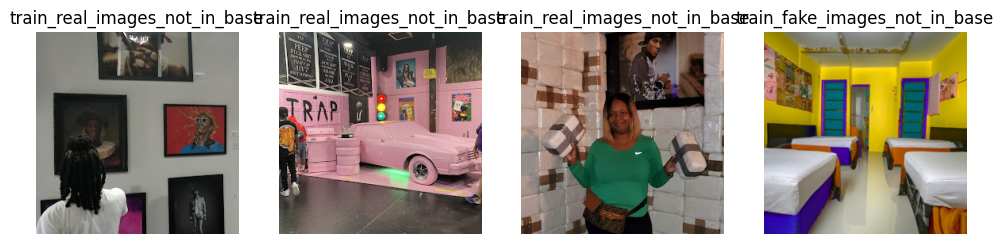

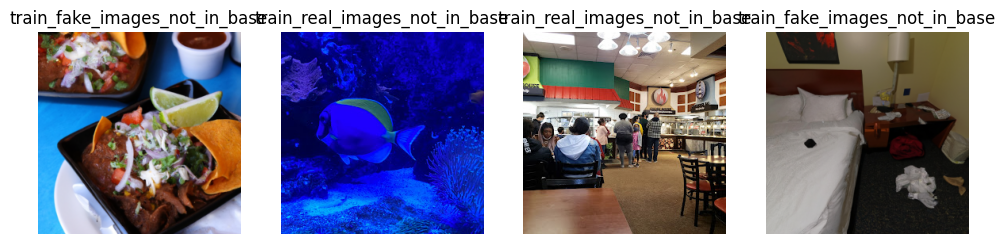

In [42]:
dls = classes.dataloaders(path)

print(f"Train items: {len(dls.train.items)}")
print(f"Valid items: {len(dls.valid.items)}")
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

In [43]:
classes = classes.new(item_tfms=Resize(256, ResizeMethod.Squish))
dls = classes.dataloaders(path)

classes = classes.new(
    item_tfms=RandomResizedCrop(256, min_scale=0.5),
    batch_tfms=aug_transforms())

In [44]:
dls = classes.dataloaders(path)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs = 4, freeze_epochs=1)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.795109,0.401206,0.116337,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.283262,0.435713,0.133663,00:13
1,0.213536,0.567238,0.148515,00:13
2,0.147802,0.755207,0.170792,00:13
3,0.106892,0.844056,0.178218,00:13


Die Bilder mit den schlechtesten loss Werte.


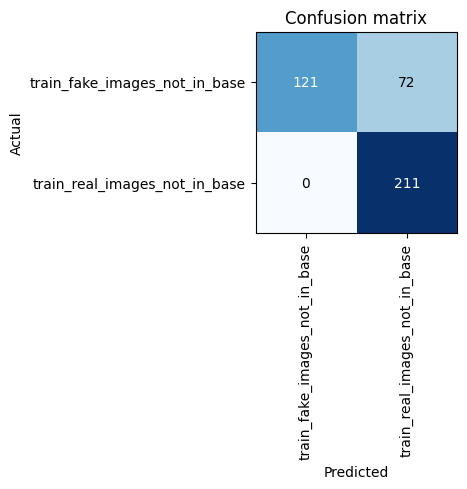

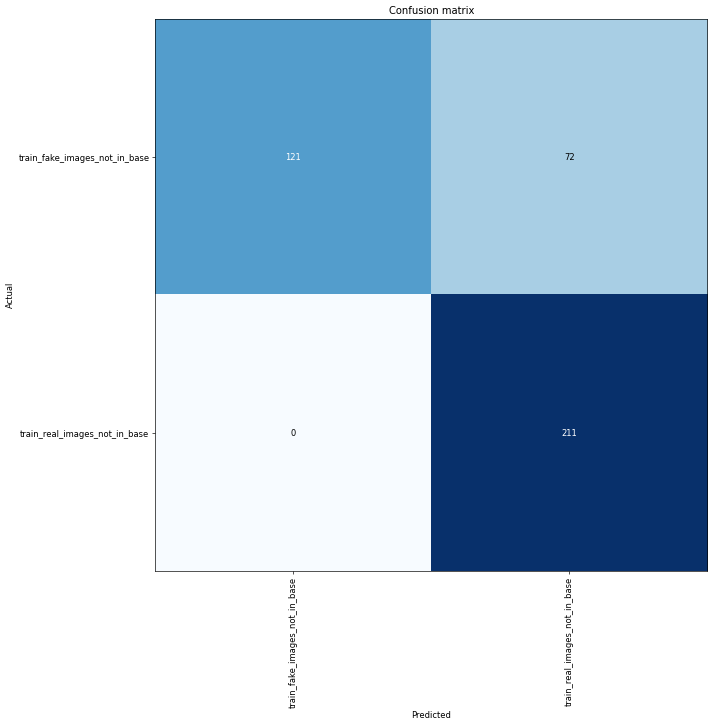

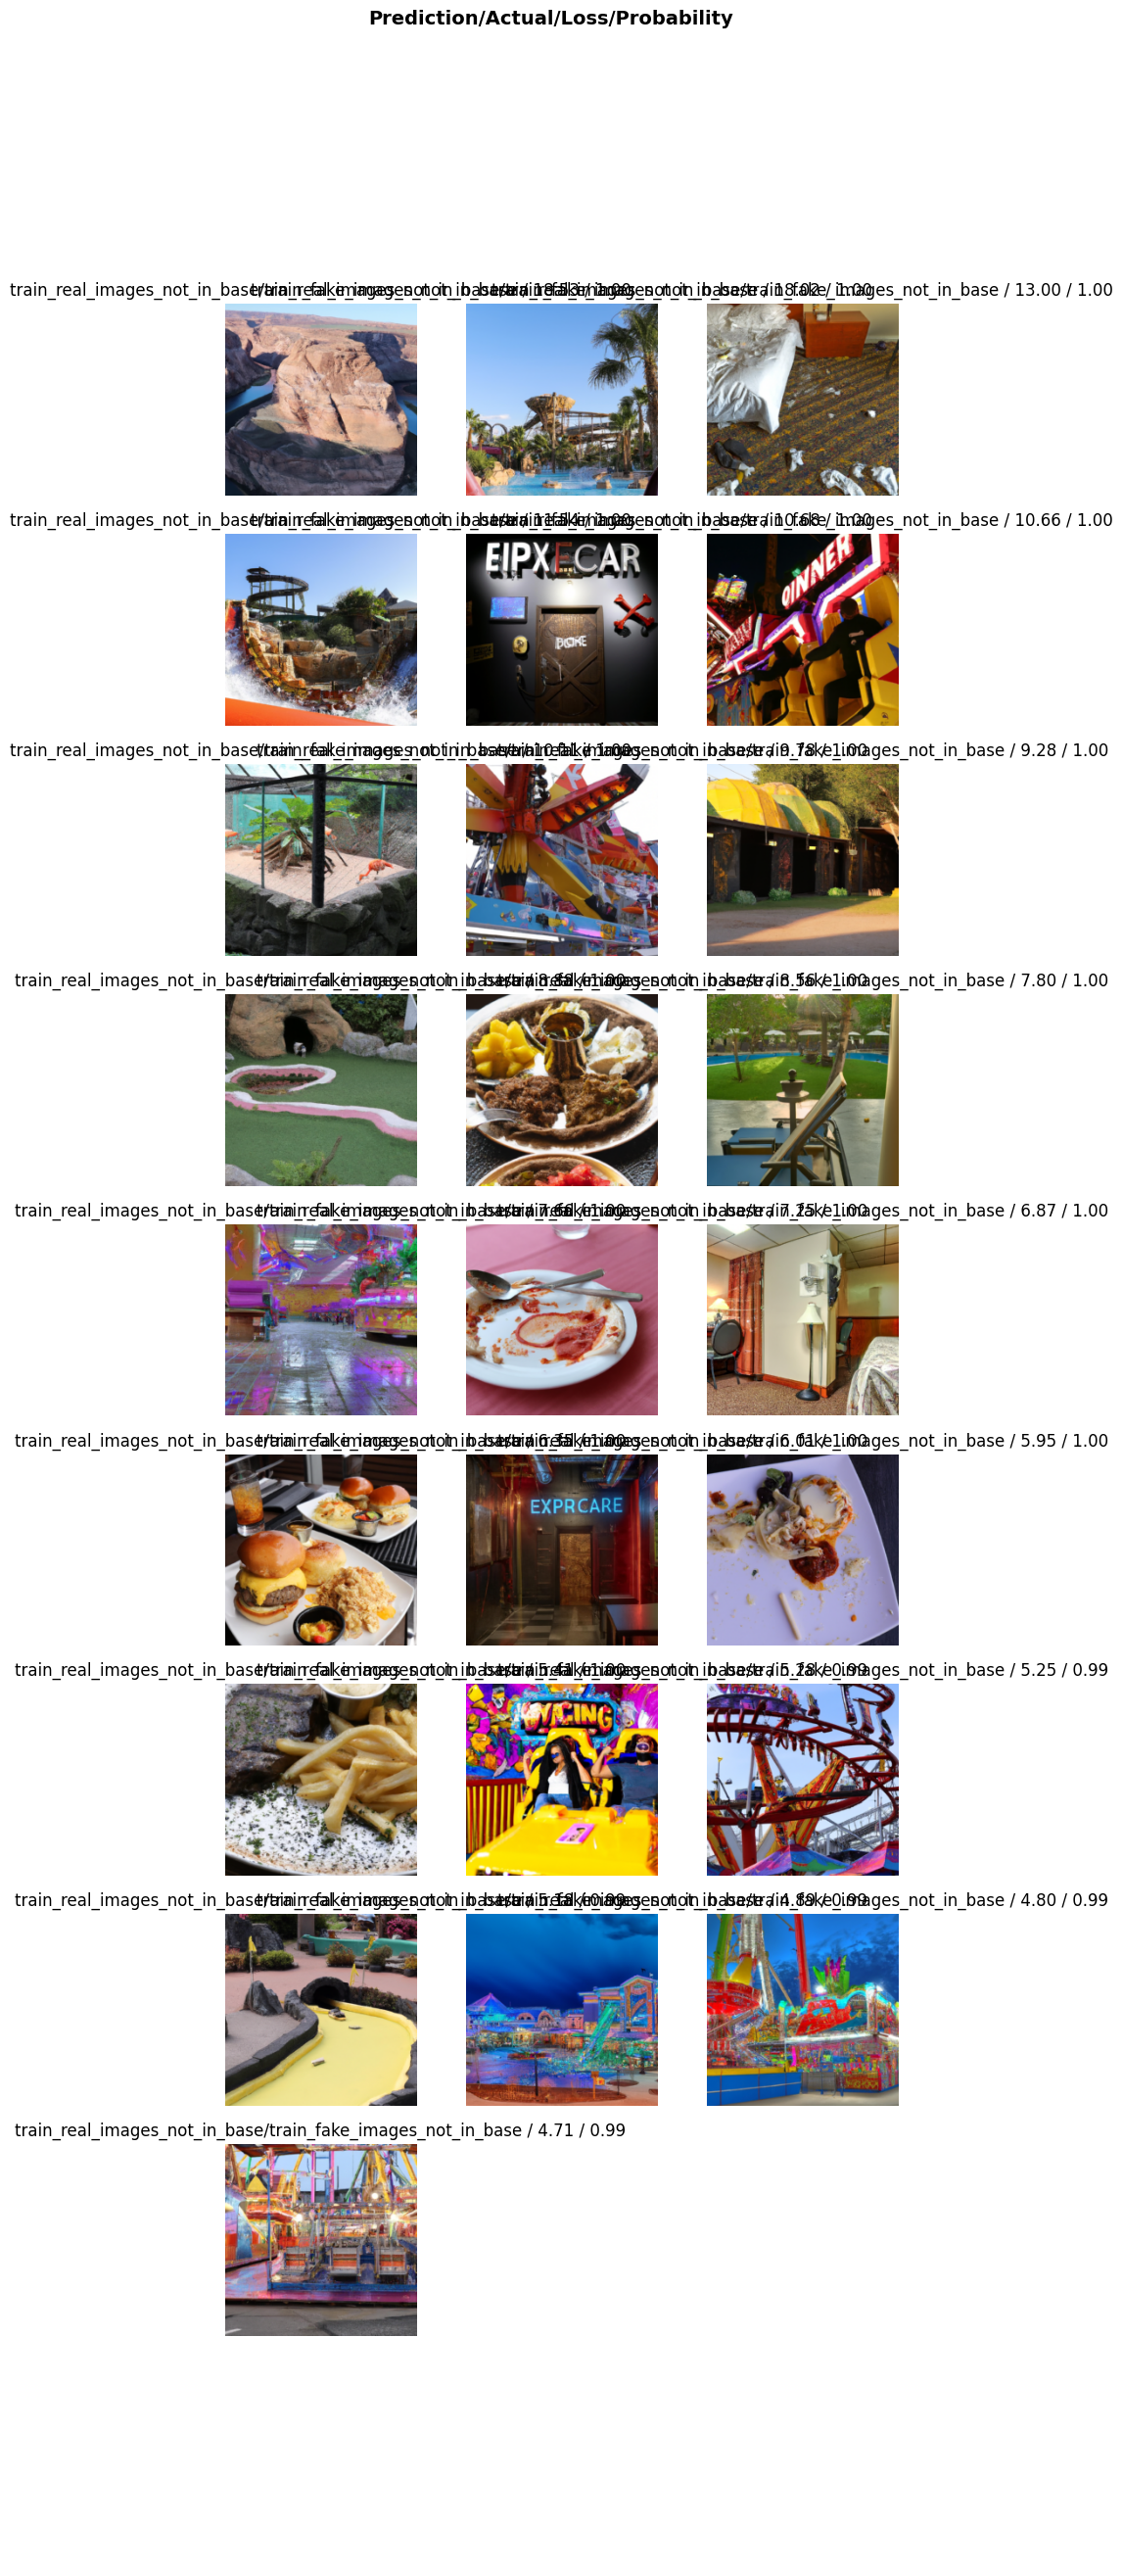

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
plt.savefig('image_classificator_confusion_matrix.svg', format='svg', dpi=1200)
print("Die Bilder mit den schlechtesten loss Werte.")
interp.plot_top_losses(25, nrows=10)

In [49]:
learn.export()

In [50]:
path.ls?

In [51]:
path = Path("/content/drive/MyDrive/review_detecion")
path.ls(file_exts='.pkl')
print("Model saved")

(#1) [Path('/content/drive/MyDrive/review_detecion/export.pkl')]